In [ ]:
import pandas as pd

In [ ]:
from math import sqrt

In [ ]:
dataset = [[1, 1], [2, 3], [4, 3], [3, 2], [5, 5]]

In [ ]:
def mean(values):
  a=sum(values)/float(len(values))
  return a

def covariance(X,x_mean,Y,y_mean):
  co=0
  for i in range(len(X)):
    co+= (X[i]-x_mean)*(Y[i]-y_mean)
  return co

def variance(values,mean):
  v=sum([(X-mean)**2 for X in values])
  return v


In [ ]:
def coefficiant(dataset):
  X=[row[0] for row in dataset]
  Y=[row[1] for row in dataset]
  x_mean ,y_mean=mean(X) ,mean(Y)
  b1=covariance(X,x_mean,Y,y_mean)/variance(X,x_mean)
  b0=y_mean-b1*x_mean
  return [b0,b1]
  


In [ ]:
coefficiant(dataset)

[0.39999999999999947, 0.8]

In [ ]:
def simpleLR(train,test):
  prediction=list()
  b0,b1=coefficiant(train)
  for row in test:
    ypred=b0+b1*row[0]
    prediction.append(ypred)
  return prediction  

In [ ]:
def rmse_m(predicted,actual):
  sum_error=0.0
  for i in range(len(actual)):
    prediction_error=predicted[i] - actual[i]
    sum_error+=(prediction_error ** 2)
  mean_error=sum_error/ float(len(actual))
  return sqrt(mean_error)  

In [ ]:
def evaluate_algorithm(dataset, algorithm):
    test_set = list()
    for row in dataset:
        row_copy = list(row)
        row_copy[-1] = None
        test_set.append(row_copy)
    predicted = algorithm(dataset, test_set)
    print(predicted)
    actual = [row[-1] for row in dataset]
    rmse = rmse_m(actual, predicted)
    return rmse

In [ ]:
# Test simple linear regression
dataset = [[1, 1], [2, 3], [4, 3], [3, 2], [5, 5]]
rmse = evaluate_algorithm(dataset, simpleLR)
print('Root Mean Squared error RMSE: %.3f' % (rmse))

[1.1999999999999995, 1.9999999999999996, 3.5999999999999996, 2.8, 4.3999999999999995]
Root Mean Squared error RMSE: 0.693


# Simple linear Regression------------

In [ ]:
df = pd.read_csv("AutoInsurSweden.txt",sep="\t",skiprows=9)
df

,X,Y
0,108,"392,5"
1,19,"46,2"
2,13,"15,7"
3,124,"422,2"
4,40,"119,4"
...,...,...
58,9,"87,4"
59,31,"209,8"
60,14,"95,5"
61,53,"244,6"


In [ ]:
df.Y=df.Y.str.replace(',','.')#replace , with .
df.dtypes

X     int64
Y    object
dtype: object

In [ ]:
df.Y=df.Y.astype(float)#chnage y datatype

In [ ]:
df.dtypes

X      int64
Y    float64
dtype: object

In [ ]:
X=df[['X']] #X=column x values
Y=df['Y'] #Y=column y values       

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:

x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size  = 0.3, random_state =7)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
type(x_train),type([df.X])

(pandas.core.frame.DataFrame, list)

In [ ]:
reg=LinearRegression()#representing LinearRegression as reg
reg.fit(x_train, y_train)# fit this model using ref.fit()


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
reg.coef_,reg.intercept_  #coef_=m/b1.  and intercept_=c/b0

(array([3.33602385]), 23.75472726509068)

In [ ]:
ypred=reg.predict(x_test)
#actual output is sitting in y_test
#in x_test we did prediction
#prediction output is sitting in ypred

In [ ]:
X.shape,Y.shape

((63, 1), (63, 1))

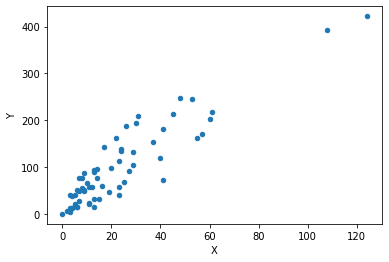

In [ ]:
import matplotlib.pyplot as plt

df.plot(x='X',y='Y',kind='scatter')

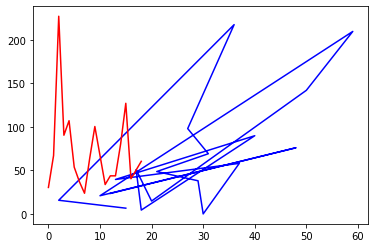

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(y_test,color="blue",linestyle="solid")
plt.plot(ypred,color="red",linestyle="solid")
fig=plt.figure()

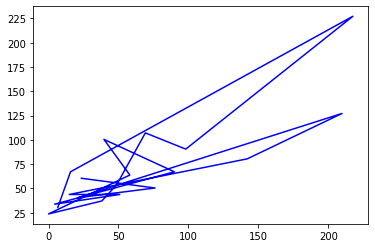

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(y_test,ypred,color="blue",linestyle="-")
fig=plt.figure()

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(y_test,ypred)
r_squared=r2_score(y_test,ypred)

In [ ]:
sqrt(mse),r_squared 
# mse is your model not going to match 35.86% of values
#r_squared =0.66 means 66% matches  that is good model

(35.86275705806889, 0.6691263944969422)